In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [117]:
wine = pd.read_csv('WineMag.csv')
wine.drop(columns=['Unnamed: 0','region_2', 'taster_twitter_handle'], inplace=True) 
#Inplace es para que se quede en el dataframe original
wine.head(10)

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [3]:
wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [4]:
wine.shape

(129971, 11)

In [5]:
#Cuantas variedades únicas
varieties = wine.variety.unique()
print(len(varieties))

708


In [6]:
#cuántos países
countries = wine.country.unique()
print(len(countries))

44


In [8]:
#cuántos provincias
province = wine.province.unique()
print(len(province))

426


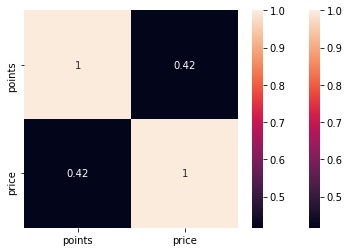

In [10]:
#Correlación entre el precio y el rating
corr=wine.corr()
seaborn.heatmap(corr)
seaborn.heatmap(corr, annot = True)


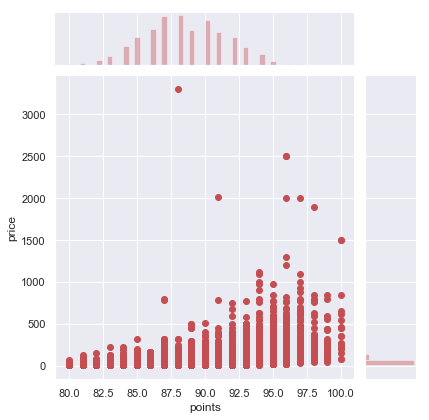

In [38]:
seaborn.jointplot( x = wine['points'],y = wine['price'],color='r')

In [11]:
#Esta linea le da el tamaño a todas las tablas por default
seaborn.set(rc={'figure.figsize':(12,10)}, style ="darkgrid") # style = "whitegrind"

In [115]:
#EL PROMEDIO DE PRECIO Y PUNTOS DE CADA VARIEDAD DE CADA PAÍS

#country_variety = wine.pivot_table(index=['country'], values=['variety'], aggfunc=count)
#country_variety.head()

variety = wine.pivot_table(index=['country', 'variety'], values=['points', 'price'], aggfunc={'points':np.mean, 'price':np.mean})
variety.to_csv('winevar.csv')



In [13]:
#TRABAJANDO CON VARIETY
winevar = pd.read_csv('winevar.csv')
winevar.head()

,country,variety,points,price
0,Argentina,Barbera,85.000000,18.000000
1,Argentina,Bonarda,86.504762,16.628571
2,Argentina,Bordeaux-style Red Blend,89.820225,41.546512
3,Argentina,Bordeaux-style White Blend,83.000000,14.000000
4,Argentina,Cabernet Blend,88.250000,36.250000


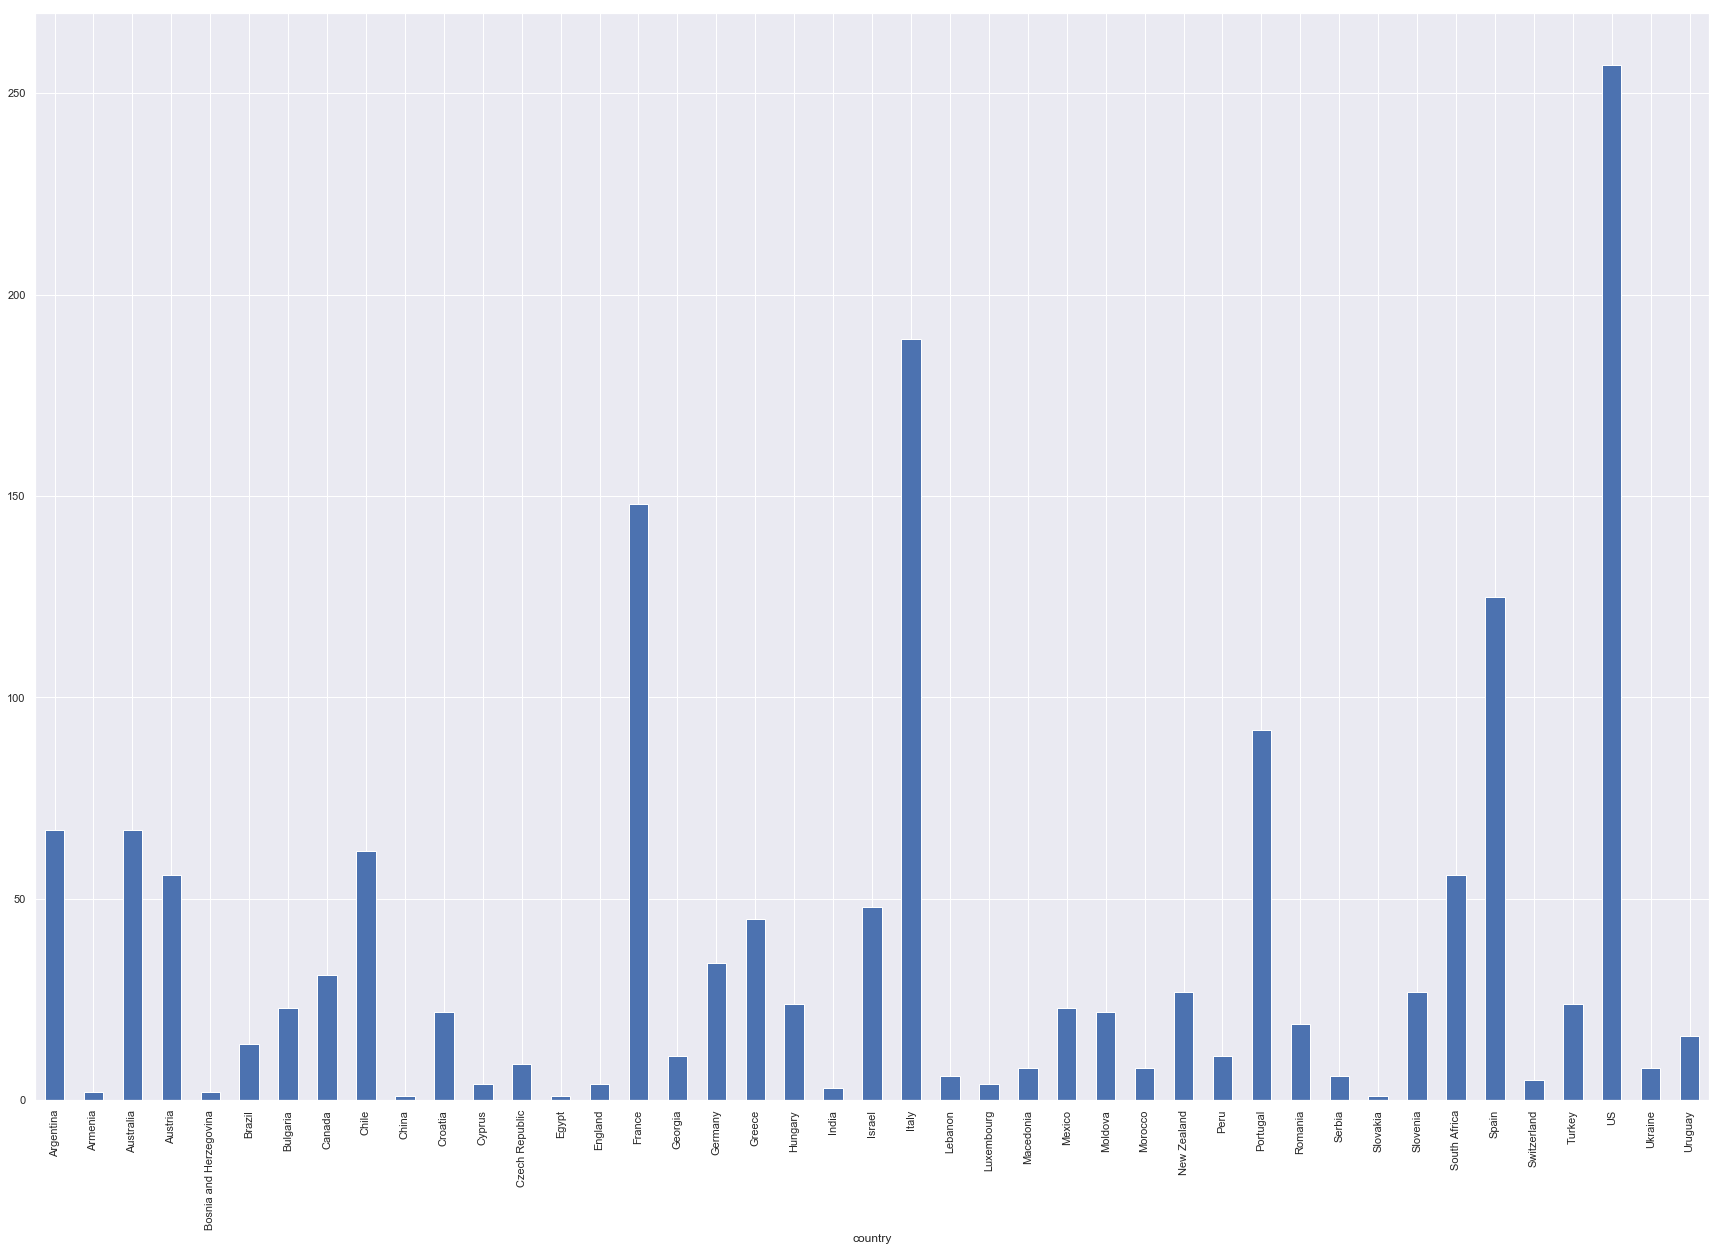

In [53]:
#TRABAJANDO CON VARIETY, conteo de cuántas variedades hay por país
variety2 = winevar.groupby(['country'])['variety'].count().plot(kind='bar')


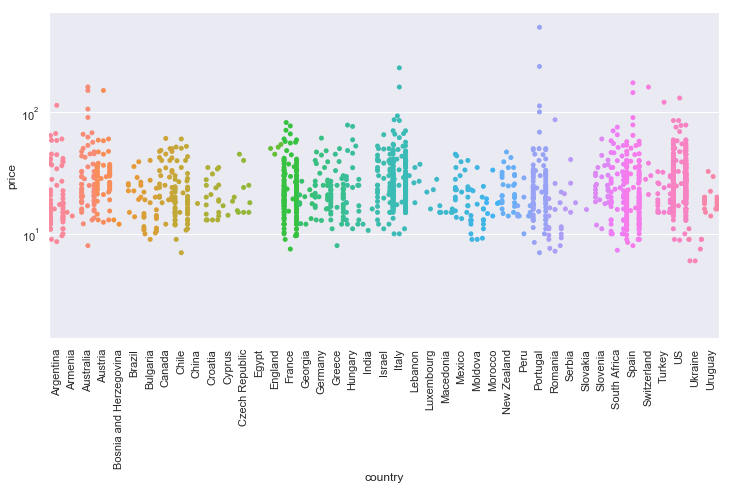

In [107]:
#GRÁFICAs DE VARIETY2
#PRECIO PROMEDIO POR PAÍS
seaborn.set(rc={'figure.figsize':(12,6)}, style ="darkgrid") # style = "whitegrind"
seaborn.swarmplot(x='country', y='price', data=winevar), plt.xticks(rotation=90)
plt.yscale("log")

#variety2 = winevar.groupby(['country'])['price'].count()
#seaborn.boxplot(data=variety2)

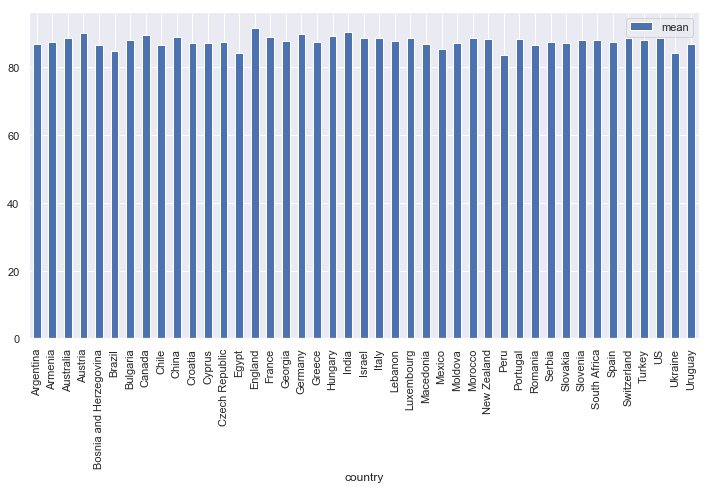

In [74]:
#evaluación media por país
seaborn.set(rc={'figure.figsize':(12,6)}, style ="darkgrid")
points = wine.groupby(['country']).agg(['mean'])['points'].plot(kind='bar')
#points.sort_values('mean')

In [ ]:
#Nuevo data set, total de vinos por país con una evaluación mayor a 90
#wine.pivot_table(index=["country", "designation"], values=["points">90])
#wine.groupby(['country']).agg(['sum'])['designation']

In [116]:
#Obtener Variedades de vinos que tienen un puntaje mayor a 90
winerate = winevar[winevar.points > 90]
winerate.head()

,country,variety,points,price
7,Argentina,Cabernet Franc-Malbec,91.000000,58.500000
25,Argentina,Malbec Blend,90.500000,66.500000
27,Argentina,Malbec-Cabernet,91.666667,113.333333
31,Argentina,Malbec-Petit Verdot,91.000000,39.500000
56,Argentina,Syrah-Viognier,90.666667,58.333333


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143]), <a list of 144 Text xticklabel objects>)

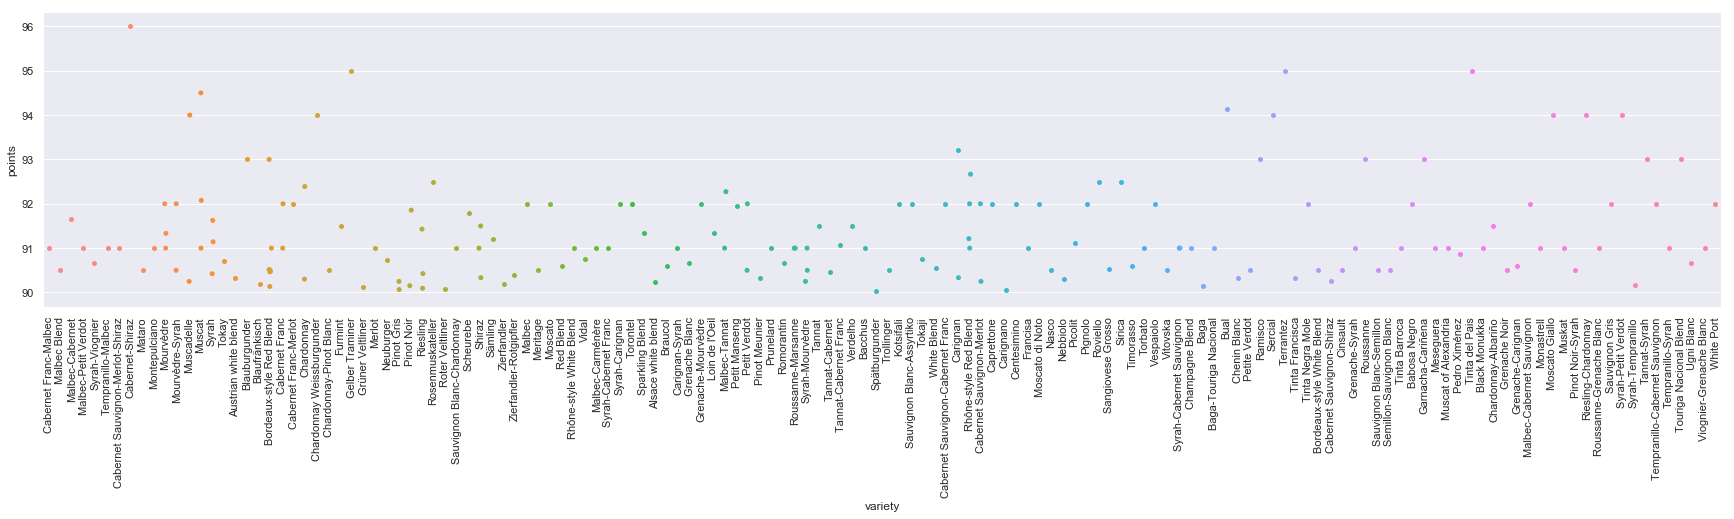

In [110]:
#PUNTUACIÓN POR VARIEDAD RATEADA ARRIBA DE LOS 90 PUNTOS
#seaborn.countplot(x = 'variety', data=winerate, palette='pastel')

seaborn.set(rc={'figure.figsize':(12,6)}, style ="darkgrid") # style = "whitegrind"
seaborn.catplot(x='variety', y='points', data=winerate, height=5, aspect=5)[]
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

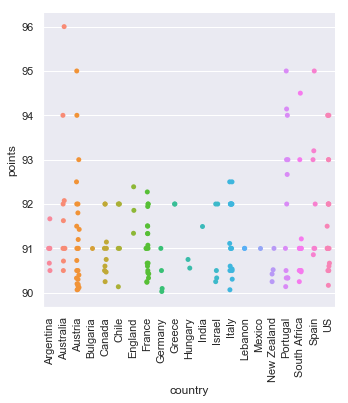

In [85]:
#PUNTUACIÓN POR PAIS RATEADA ARRIBA DE LOS 90 PUNTOS
#seaborn.countplot(x = 'variety', data=winerate, palette='pastel')

seaborn.set(rc={'figure.figsize':(12,6)}, style ="darkgrid") # style = "whitegrind"
seaborn.catplot(x='country', y='points', data=winerate)
plt.xticks(rotation=90)

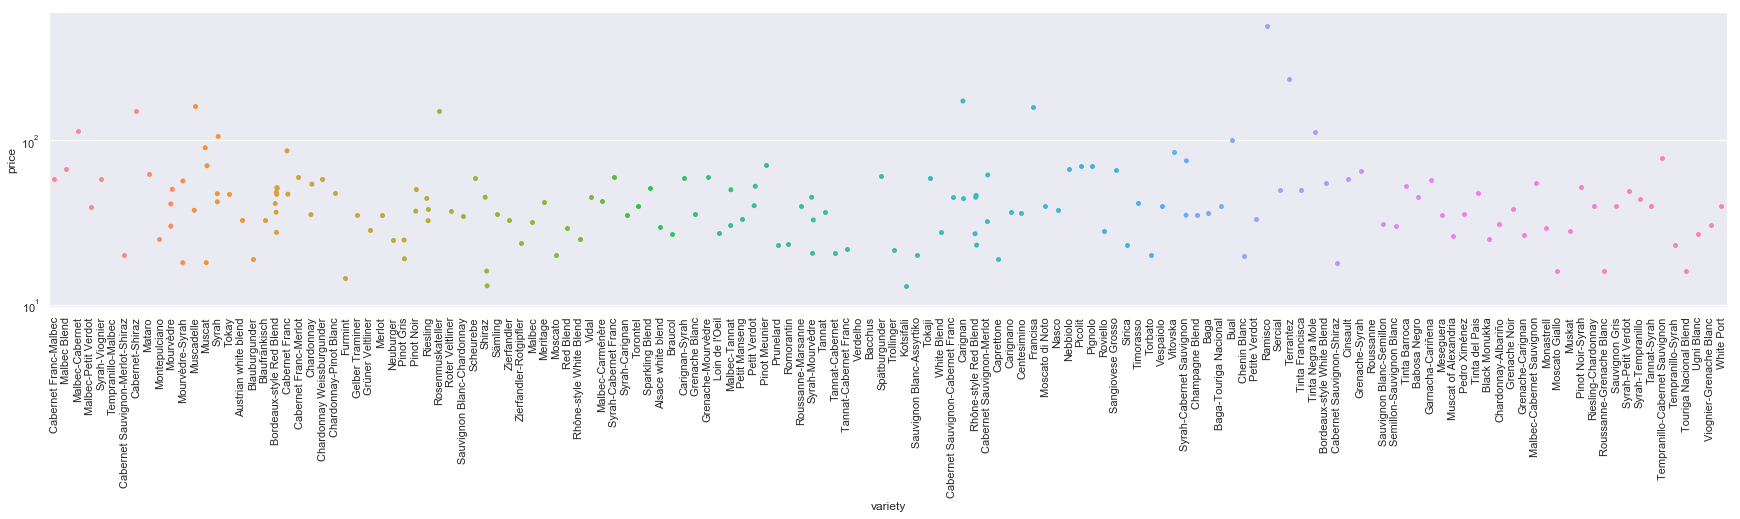

In [72]:
#PRECIO POR VARIEDAD RATEADA ARRIBA DE LOS 90 PUNTOS
#Analizar el rango de precio de esos vinos
seaborn.set(rc={'figure.figsize':(12,6)}, style ="darkgrid") # style = "whitegrind"
seaborn.catplot(x='variety', y='price', data=winerate, height=5, aspect=5)
plt.xticks(rotation=90)

plt.yscale("log")

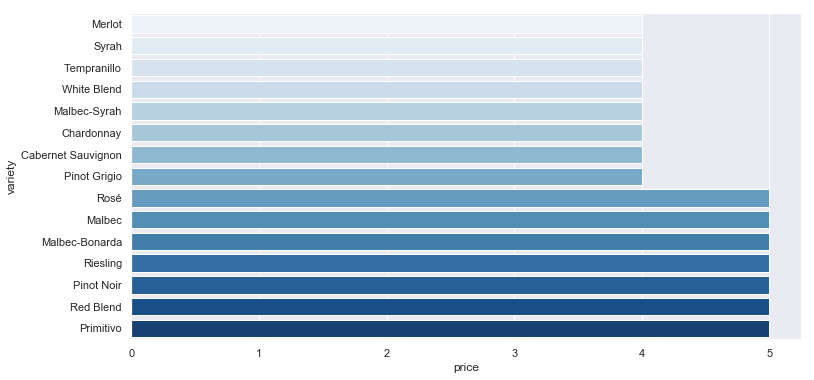

In [96]:
seaborn.set(rc={'figure.figsize':(12,6)}, style ="darkgrid")
grapes = wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:15]
seaborn.barplot(x = grapes['price'], y = grapes.index,palette = 'Blues')


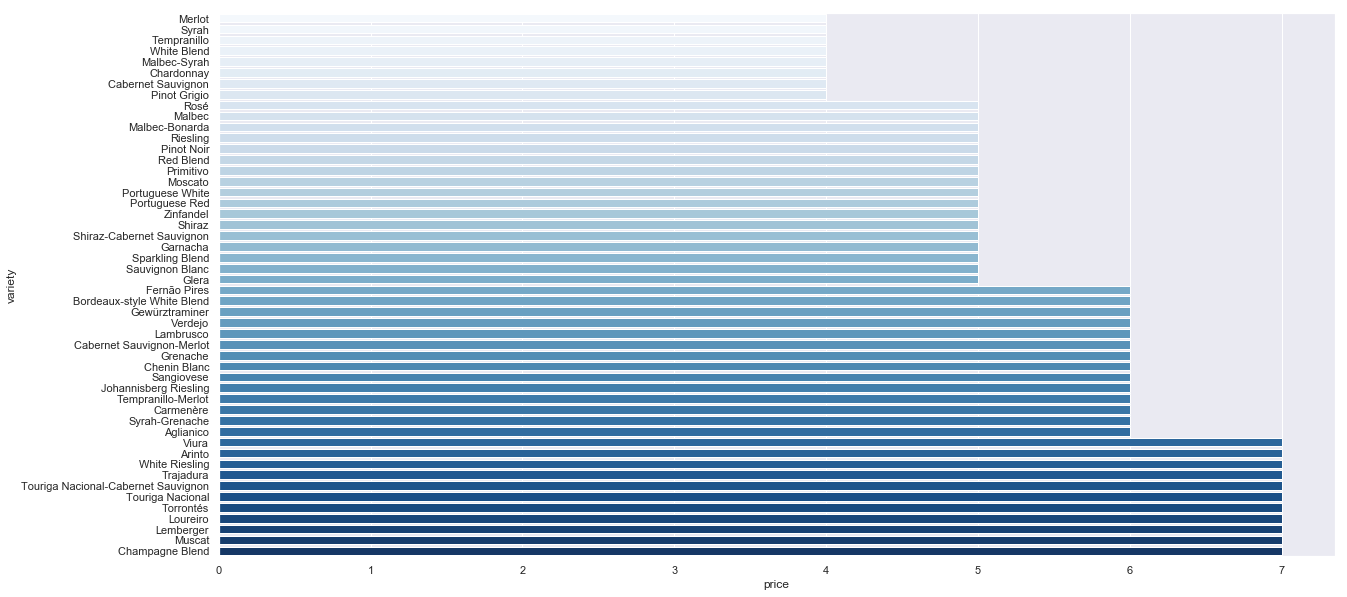

In [113]:
seaborn.set(rc={'figure.figsize':(20,10)}, style ="darkgrid")
grapes = wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:50]
seaborn.barplot(x = grapes['price'], y = grapes.index, palette = 'Blues')

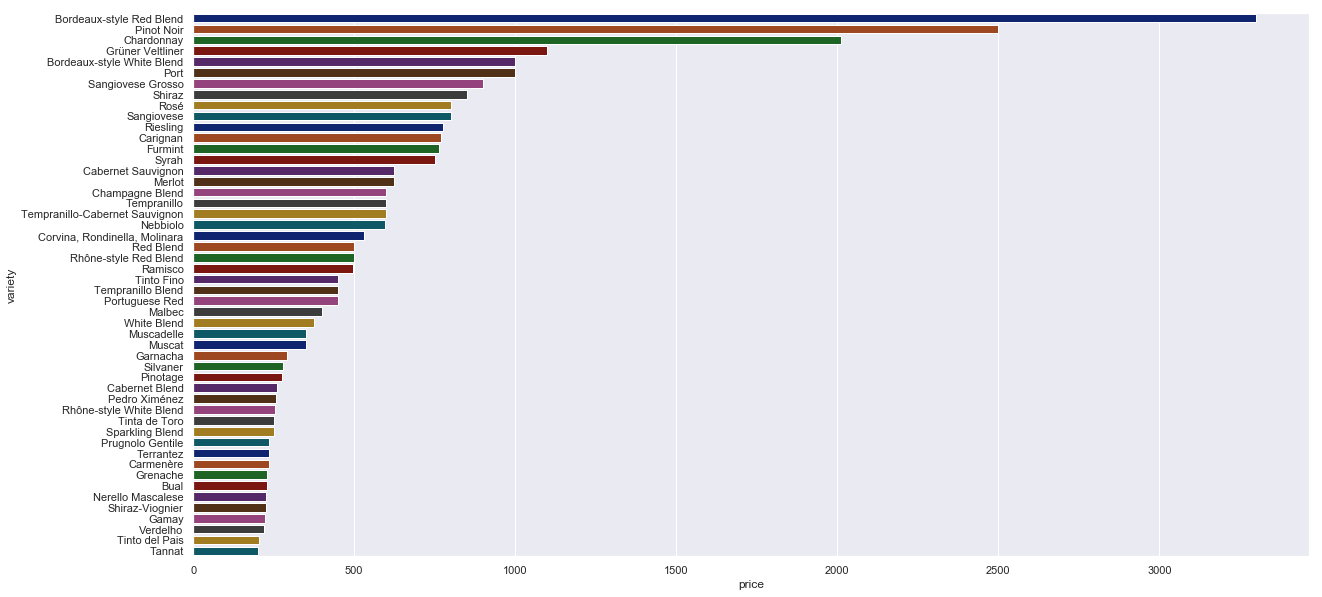

In [114]:
#LAS VARIEDADES MÁS CARAS
seaborn.set(rc={'figure.figsize':(20,10)}, style ="darkgrid")
grapes = wine.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:50]
seaborn.barplot(x = grapes['price'], y = grapes.index, palette = 'dark')

<Figure size 2880x1440 with 0 Axes>

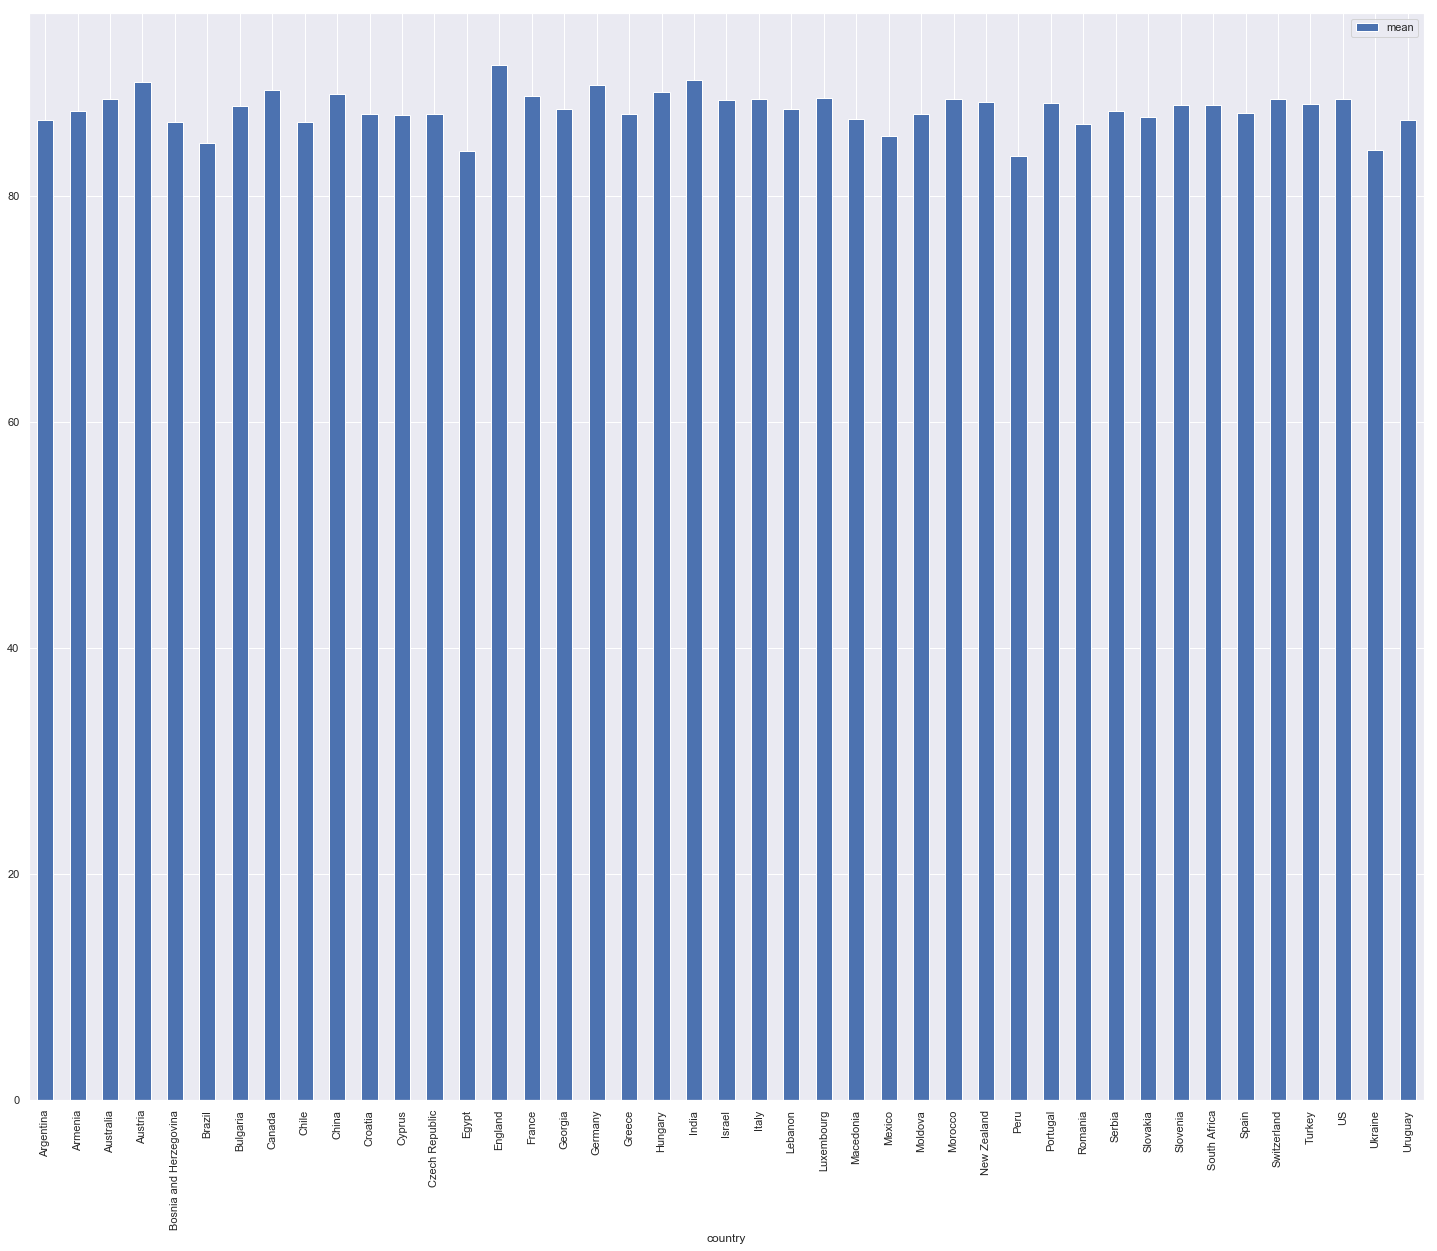

In [19]:
#GRÁFICA DE BARRAS DE LOS PUNTOS PROMEDIO POR PAÍS
plt.figure(figsize=(40,20))
points.groupby('country').mean().plot(kind='bar', y = 'mean')


Text(0.5,1,'Frecuencia de Rating y precio')

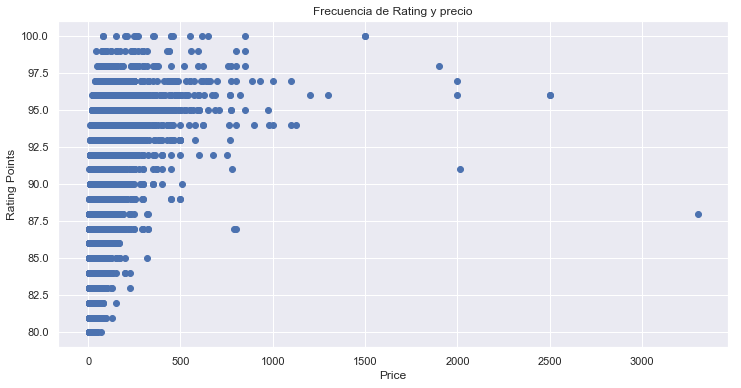

In [86]:
#Correlación entre puntos de rating y precio

plt.scatter(wine.price, wine.points)
plt.xlabel('Price')
plt.ylabel('Rating Points')
plt.title('Frecuencia de Rating y precio')

In [30]:
##price = wine.groupby(['country']).agg(['mean'])['price']

price =wine.groupby(['country']).mean()['price']
price.sort_by()
#seaborn.boxplot(data=price)

country
Argentina                 24.510117
Armenia                   14.500000
Australia                 35.437663
Austria                   30.762772
Bosnia and Herzegovina    12.500000
Brazil                    23.765957
Bulgaria                  14.645390
Canada                    35.712598
Chile                     20.786458
China                     18.000000
Croatia                   25.450704
Cyprus                    16.272727
Czech Republic            24.250000
Egypt                           NaN
England                   51.681159
France                    41.139120
Georgia                   19.321429
Germany                   42.257547
Greece                    22.364425
Hungary                   40.648276
India                     13.333333
Israel                    31.768916
Italy                     39.663770
Lebanon                   30.685714
Luxembourg                23.333333
Macedonia                 15.583333
Mexico                    26.785714
Moldova             

Text(0,0.5,'Country')

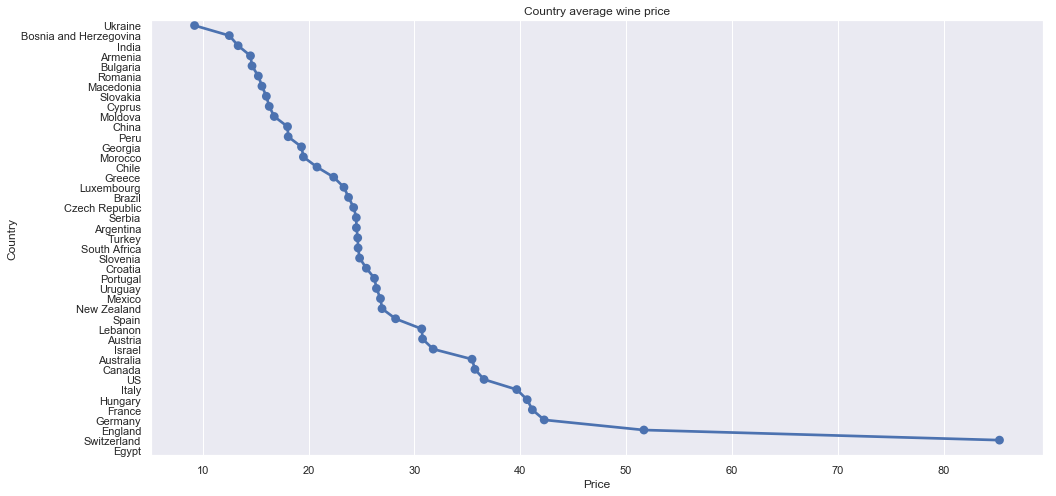

In [31]:
price2 = wine.groupby(['country',]).mean()['price'].sort_values(ascending=True).to_frame()
plt.figure(figsize=(16,8))
seaborn.pointplot(x = price2['price'] ,y = price2.index ,color='b',orient='h',markers='o')
plt.title('Country average wine price')
plt.xlabel('Price')
plt.ylabel('Country')



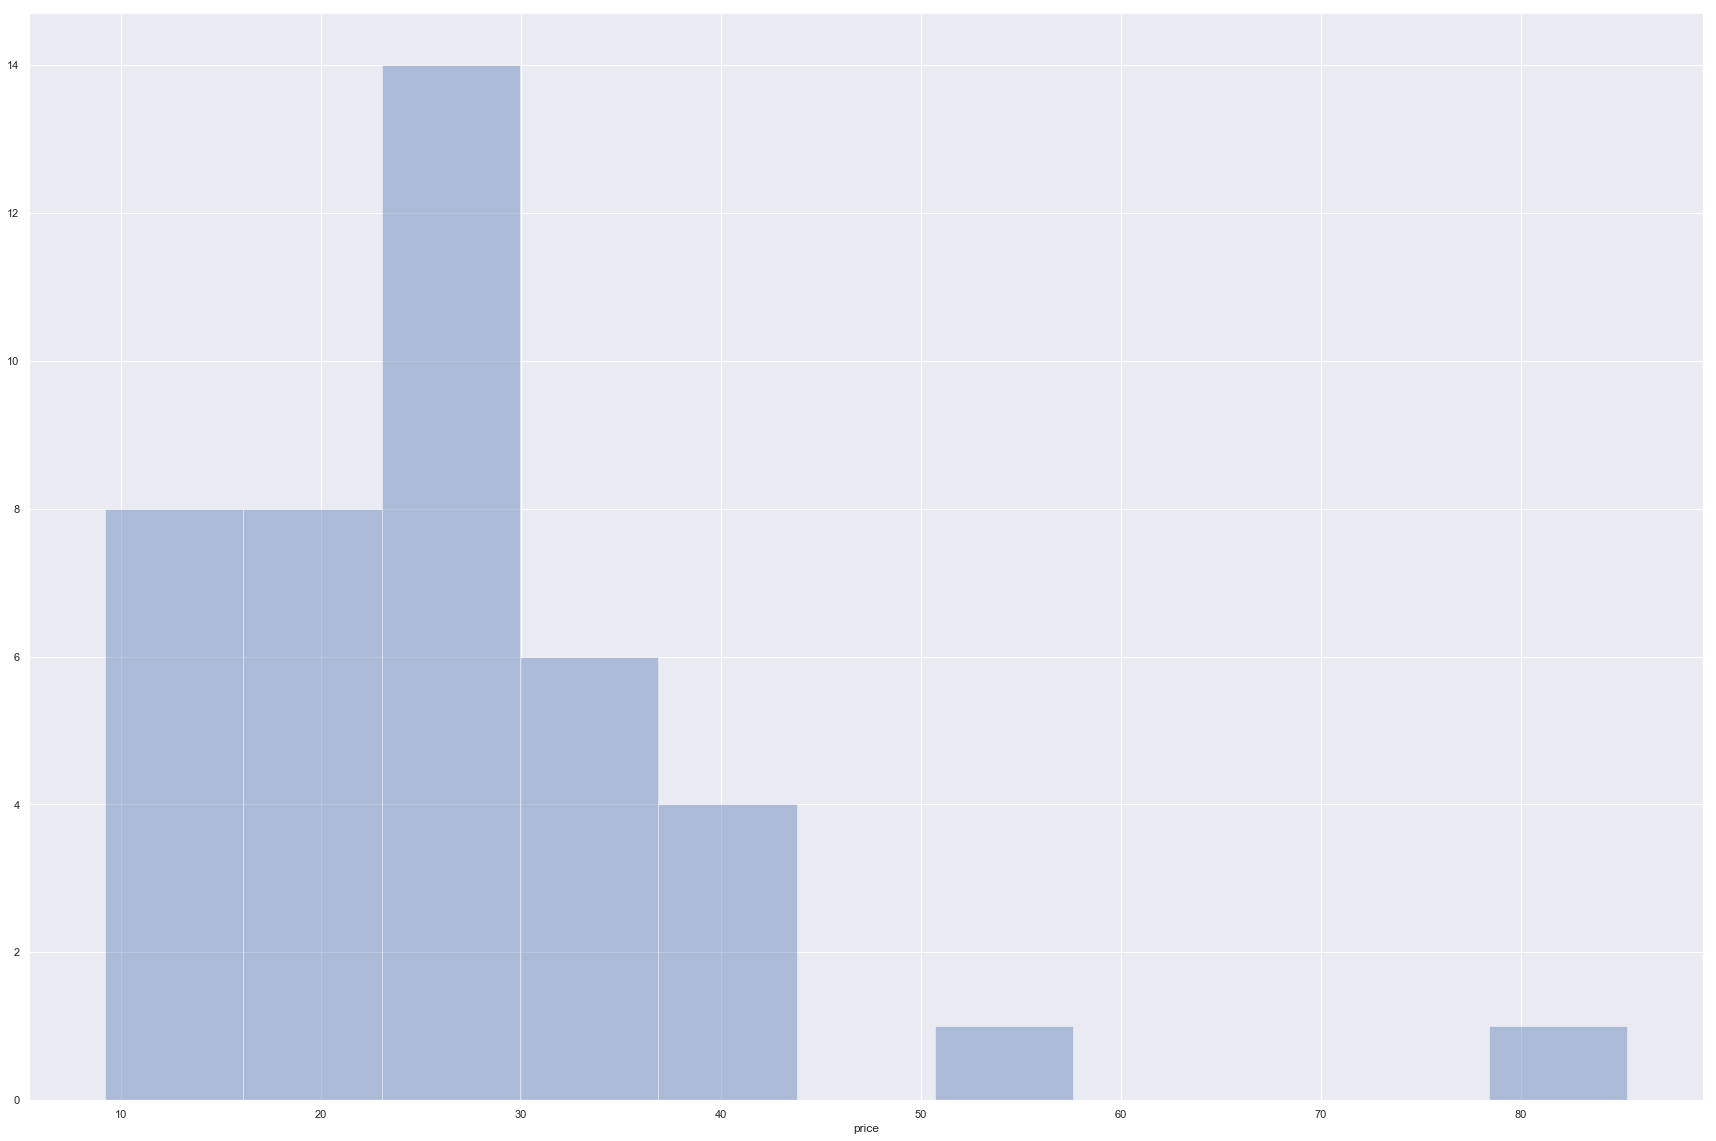

In [32]:
seaborn.distplot(price2['price'].dropna(), kde=False)

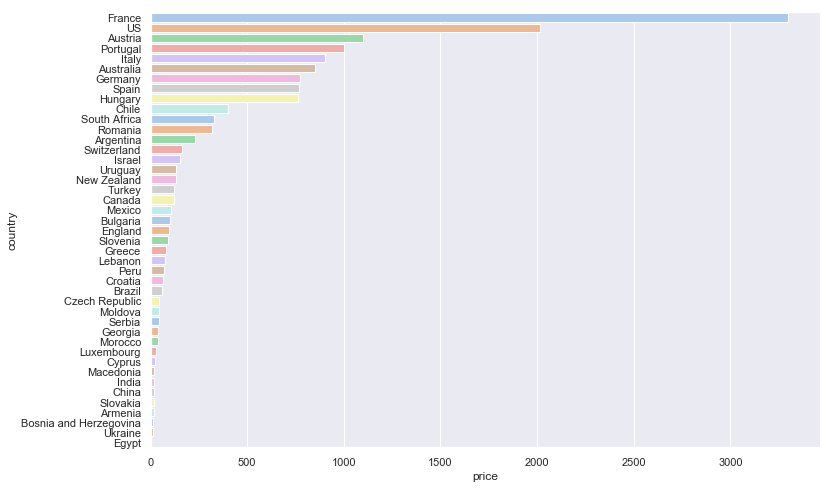

In [88]:
#VINOS MÁS CAROS
price3 = wine.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12,8))
seaborn.barplot(x = price3['price'], y = price3.index, palette= 'pastel')

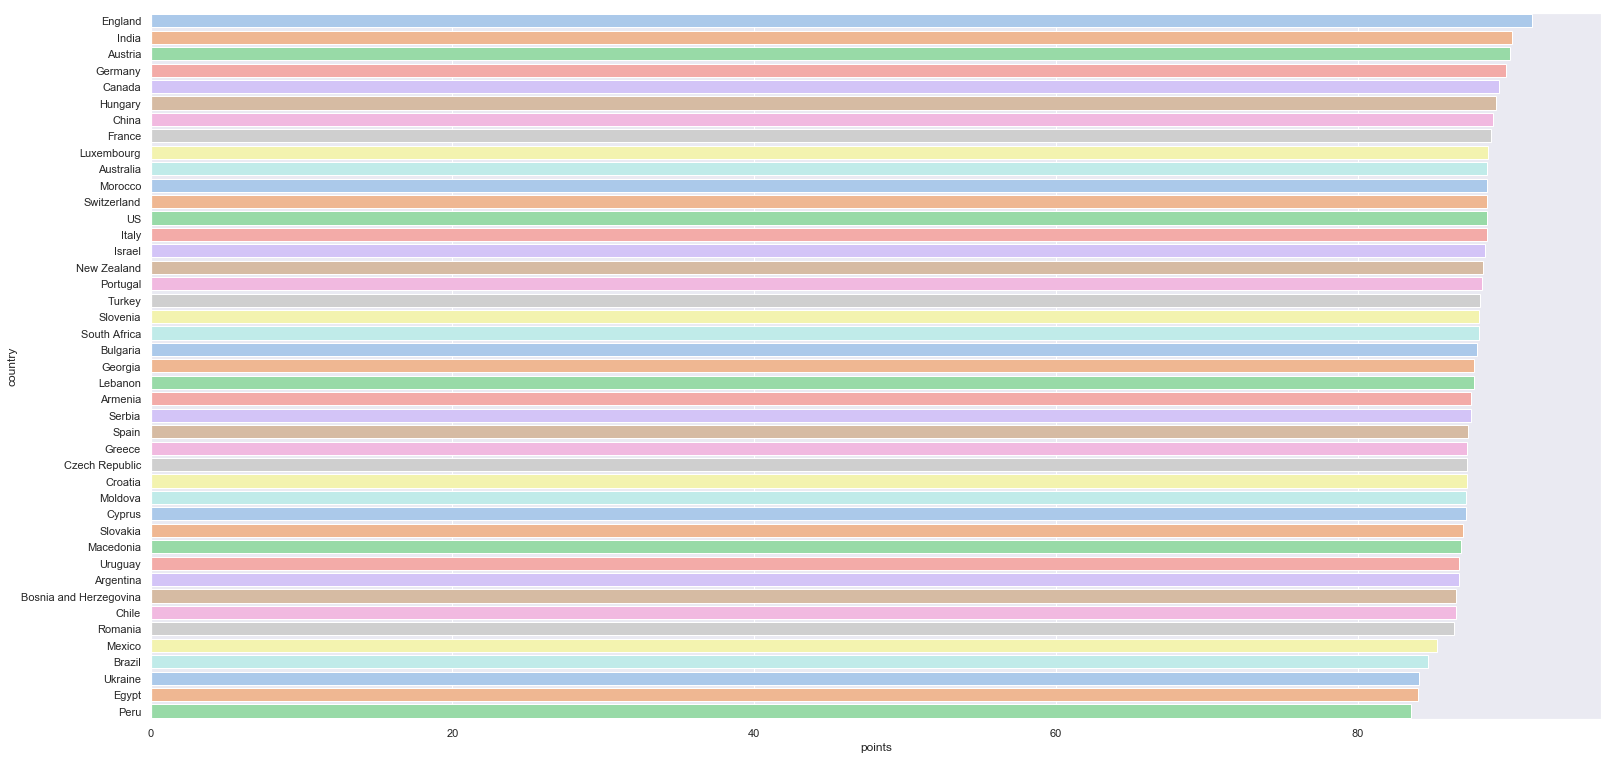

In [34]:
#Esta gráfica debe de mostrar los países con los mejores puntos en orden descendente
points2 = wine.groupby(['country'])['points'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(26,13)) #No funciona :( 
seaborn.barplot(x = points2['points'], y = points2.index, palette= 'pastel')
#plt.title=('BEST RATED COUNTRIES')

<Figure size 864x576 with 0 Axes>

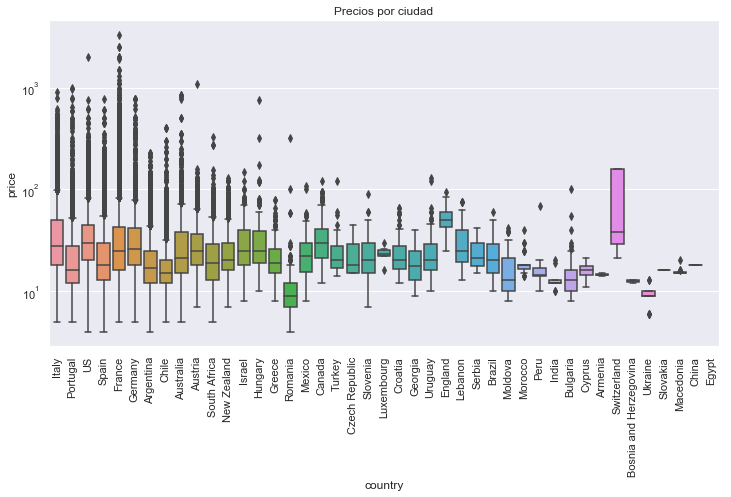

<Figure size 864x576 with 0 Axes>

In [89]:
#Graficar el precio por país, determinar si un vino es más caro por su origen.
#plt.figure(figsize=(40,20))
seaborn.boxplot(x = wine['country'], y = wine['price'])
plt.yscale("log") #Esto hace que el eje Y tenga menos números y la gráfica no se vea enana
plt.title('Precios por ciudad')
plt.xticks(rotation=90)
plt.figure(figsize=(12,8))